In [44]:
#%pip install numpy
#%pip install pandas
#%pip install matplotlib
#%pip install seaborn
#%pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The relevant data set is collected in the subfolder "data". Note, that the data itself is not part of the repository and should be downloaded from  https://survey.stackoverflow.co/

In [3]:
df = pd.read_csv('./data/stack-overflow-developer-survey-2024/survey_results_public.csv')
print('total number of participants:', len(df))
#df.head()

total number of participants: 65437


Question 1: What are the top x countries with most participants in the survey? If we take a look at the distribution of some 
variables (e.g. usage of AI Tools) is there a dependency on the country?

First, identify the countries with the highest number of participants and choose the top n countries

In [31]:

num_countries = 10

considered_countries_order = df['Country'].value_counts().head(num_countries).index.tolist()
considered_countries = set(considered_countries_order)
print('countries under investigation: ', considered_countries_order)

df_restricted_countries = df.loc[df['Country'].isin(considered_countries)]
n_participants_top_countries = len(df_restricted_countries)
p_participants_top_countries = n_participants_top_countries / len(df) * 100
print('reduced data set: ', len(df_restricted_countries), 'accounts for ', p_participants_top_countries, '% of all accounts')

participants_per_country = df_restricted_countries['Country'].value_counts()
print(participants_per_country)

['United States of America',
 'Germany',
 'India',
 'United Kingdom of Great Britain and Northern Ireland',
 'Ukraine',
 'France',
 'Canada',
 'Poland',
 'Netherlands',
 'Brazil']

Show the selected countries on a world map

In [5]:
# load world map data
url = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'
world = gpd.read_file(url)

# rename column country names in world map data
def rename_world_data(world):
    ''' rename countries in world data set'''
    renaming_dic = {
        'Bosnia and Herzegovina': 'Bosnia and Herz.',
        'Central African Republic': 'Central African Rep.',
        'Congo (Brazzaville)': 'Congo',
        'Congo (Kinshasa)': 'Dem. Rep. Congo',
        'Côte d\'Ivoire': 'Côte d’Ivoire',
        'Dominican Republic': 'Dominican Rep.',
        'Gambia': 'Gambia, The',
        'Guinea-Bissau': 'Guinea-Biss',
        'Ivory Coast': 'Côte d’Ivoire',
        'Laos': 'Lao PDR',
        'Macedonia': 'Macedonia, FYR',
        'Moldova': 'Moldova, Republic of',
        'Myanmar': 'Myanmar/Burma',
        'Palestinian Territories': 'West Bank and Gaza',
        'Russian Federation': 'Russia',
        'Serbia': 'Serbia and Montenegro',
        'South Korea': 'Korea, Republic of',
        'Sudan (Nijmegen)': 'Sudan',
        'Syria': 'Syrian Arab Republic',
        'Tanzania': 'Tanzania, United Republic of',
        'The Gambia': 'Gambia, The',
        'Timor-Leste': 'Timor-Leste (Papua New Guinea)',
        'United Kingdom': 'United Kingdom of Great Britain and Northern Ireland',
        'United States': 'United States of America',
        'Venezuela': 'Venezuela, Bolivarian Republic of',
        'Vietnam': 'Viet Nam'
    }
    world['name'] = world['name'].replace(renaming_dic)    
    return world

world = rename_world_data(world)

# check wether the top n countries of the survey exists in world data set
missing_countries_in_world_data = set(considered_countries) - set(world['name'])
assert not missing_countries_in_world_data, f"There are countries missing in the world data set: {missing_countries_in_world_data}"


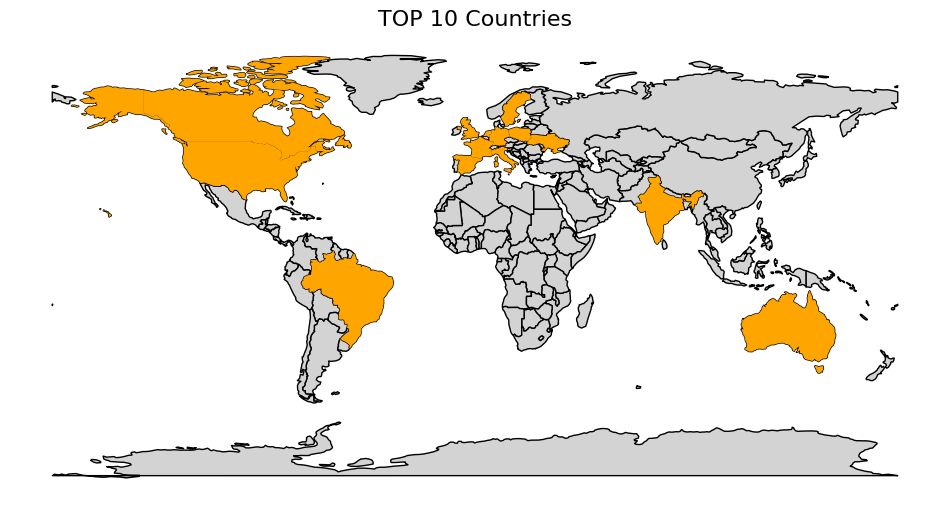

In [6]:
# plot the world map with highlighted top x countries from survey
# TODO: indicate the percentage of participants

world['meets_criteria'] = False
world.loc[world['name'].isin(considered_countries),'meets_criteria'] = True    

fig, ax = plt.subplots(figsize=(12, 8))
world.plot(ax=ax, color='lightgray', edgecolor='black')  
world[world['meets_criteria']].plot(ax=ax, color='orange')  

ax.set_title('TOP 10 Countries', fontsize=16)
ax.axis('off')

plt.show()    


Consider the parameter 'AISelect', which refers to the question: "Do you currently use AI tools in your development process?

In [9]:
# full dataset
df['AISelect'].value_counts(dropna=True,normalize=True)

AISelect
Yes                        0.618353
No, and I don't plan to    0.243601
No, but I plan to soon     0.138047
Name: proportion, dtype: float64

In [22]:

# closer look at the AI usage in the top 10 countries
subset_AISelect = df[['Country','AISelect']].dropna(how='any')
print("For AISelect the dataset is reduced to {} participants".format(len(subset_AISelect)))

subset_AISelect_topx = subset_AISelect.loc[subset_AISelect['Country'].isin(considered_countries)].copy()
subset_AISelect_topx['AISelect'].value_counts(normalize=True)

subset_AISelect_topx['AI_Usage_True'] = subset_AISelect_topx['AISelect'] == 'Yes'
result = subset_AISelect_topx.groupby('Country')['AI_Usage_True'].mean().sort_values(ascending=False)
print(result)


For AISelect the dataset is reduced to 58443 participants
Country
Ukraine                                                 0.723388
India                                                   0.679404
Brazil                                                  0.659839
Spain                                                   0.652915
Poland                                                  0.629678
Sweden                                                  0.620040
Netherlands                                             0.602359
Canada                                                  0.582054
Italy                                                   0.571321
Germany                                                 0.570963
Australia                                               0.548284
United States of America                                0.542496
France                                                  0.542025
United Kingdom of Great Britain and Northern Ireland    0.507012
Name: AI_Usage_True, dty

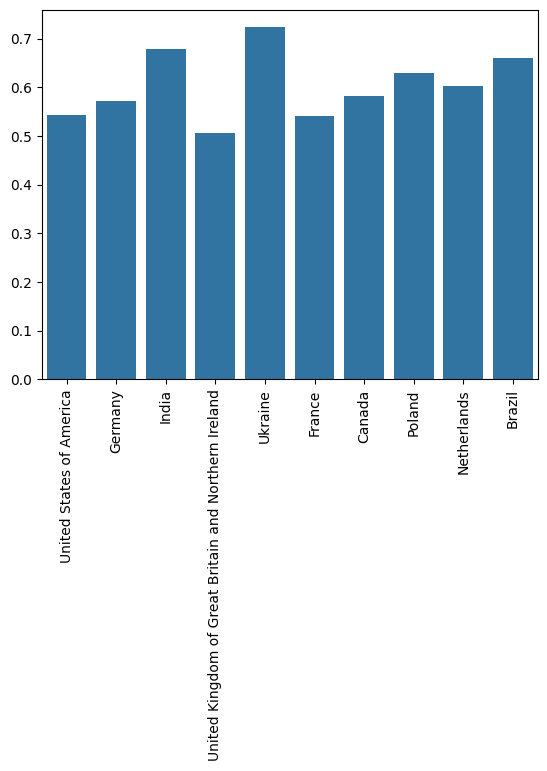

In [47]:


values = [result[i] for i in considered_countries_order]
sns.barplot(x=considered_countries_order, y=values)
plt.xticks(rotation=90)

# Plot anzeigen
plt.show()
# test = pd.DataFrame({
#     'Country': considered_countries_order,
#     'Value': values
# })
# test.plot(kind='bar', rot=90)


Consider the parameter 'PrefessionalTech', which refers to the question: "My company has:?"

In [68]:
# full dataset
test=df[['ProfessionalTech']].dropna()
#test.head()
test['B'] = test['ProfessionalTech'].apply(lambda x: 'AI-assisted technology tool' in x)
test.head()
test['B'].value_counts(normalize=True)

B
False    0.676055
True     0.323945
Name: proportion, dtype: float64

For AISelect the dataset is reduced to 27764 participants
Country
Canada                                                  0.374481
United States of America                                0.367675
Poland                                                  0.358247
Germany                                                 0.346629
Netherlands                                             0.332331
United Kingdom of Great Britain and Northern Ireland    0.325325
India                                                   0.307864
Brazil                                                  0.305483
Ukraine                                                 0.300523
France                                                  0.275787
Name: Prof_AI_True, dtype: float64


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'United States of America'),
  Text(1, 0, 'Germany'),
  Text(2, 0, 'India'),
  Text(3, 0, 'United Kingdom of Great Britain and Northern Ireland'),
  Text(4, 0, 'Ukraine'),
  Text(5, 0, 'France'),
  Text(6, 0, 'Canada'),
  Text(7, 0, 'Poland'),
  Text(8, 0, 'Netherlands'),
  Text(9, 0, 'Brazil')])

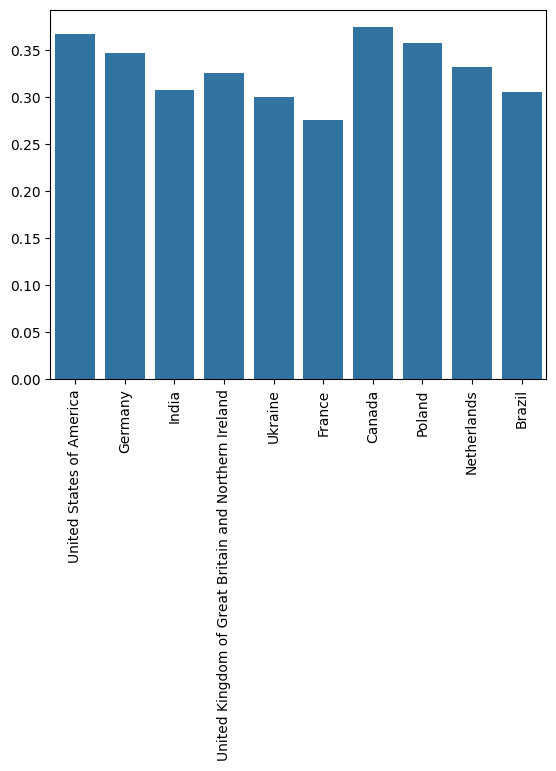

In [79]:
# closer look at the AI usage in Professional Tech in the top 10 countries
subset_ProfessionalTech_AI = df[['Country','ProfessionalTech']].dropna(how='any')
print("For ProfessionalTech_AIthe dataset is reduced to {} participants".format(len(subset_ProfessionalTech_AI)))

subset_ProfessionalTech_AI_topx = subset_ProfessionalTech_AI.loc[subset_ProfessionalTech_AI['Country'].isin(considered_countries)].copy()
subset_ProfessionalTech_AI_topx['ProfAI'] = subset_ProfessionalTech_AI_topx['ProfessionalTech'].apply(lambda x: 'AI-assisted technology tool' in x)
subset_ProfessionalTech_AI_topx['ProfAI'].value_counts(normalize=True)

subset_ProfessionalTech_AI_topx['Prof_AI_True'] = subset_ProfessionalTech_AI_topx['ProfAI'] == True
result = subset_ProfessionalTech_AI_topx.groupby('Country')['Prof_AI_True'].mean().sort_values(ascending=False)
print(result)

values = [result[i] for i in considered_countries_order]
sns.barplot(x=considered_countries_order, y=values)
plt.xticks(rotation=90)

Consider the parameter 'PrefessionalQuestion', which refers to the question: "When you have a technical question at work, where do you first go to get an answer?"

In [82]:
# full dataset
test=df[['ProfessionalQuestion']].dropna()
#test.head(20)
test['ProfessionalQuestion'].value_counts(normalize=True)



ProfessionalQuestion
Traditional public search engine                                                                                  0.548929
A coworker                                                                                                        0.184816
AI-powered search (free)                                                                                          0.078141
AI-powered search (paid)                                                                                          0.067588
Slack search                                                                                                      0.036554
Do search of internal share drives/storage locations for documentation (i.e., not a structured knowledge base)    0.032527
Internal Developer portal                                                                                         0.026973
Other:                                                                                                            0.01

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Internal Developer portal'),
  Text(1, 0, 'A coworker'),
  Text(2, 0, 'Traditional public search engine'),
  Text(3, 0, 'Slack search'),
  Text(4, 0, 'Other:'),
  Text(5, 0, 'AI-powered search (paid)'),
  Text(6, 0, 'AI-powered search (free)'),
  Text(7, 0, 'Do search of internal share drives/storage locations for documentation (i.e., not a structured knowledge base)'),
  Text(8, 0, 'Microsoft Teams search')])

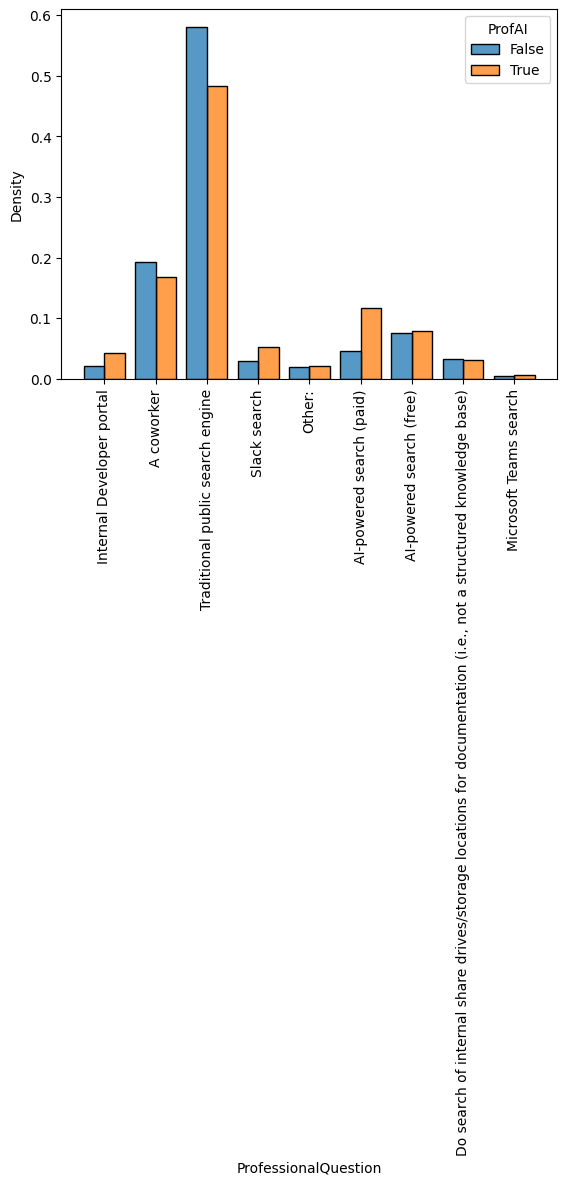

In [94]:
test=df[['ProfessionalTech','ProfessionalQuestion']].dropna()
#test.head(20)
test['ProfAI'] = test['ProfessionalTech'].apply(lambda x: 'AI-assisted technology tool' in x)
sns.histplot(data=test, x='ProfessionalQuestion', stat="density", hue='ProfAI', multiple='dodge',common_norm=False, shrink=0.8)
plt.xticks(rotation=90)


Unterschied AISelect und AI Tools bleibt auch für Subgruppe bestehen

In [95]:
test3 = df[['ProfessionalTech','ProfessionalQuestion','AISelect']].dropna()
test3['AISelect'].value_counts(dropna=True,normalize=True)

AISelect
Yes                        0.624390
No, and I don't plan to    0.235032
No, but I plan to soon     0.140578
Name: proportion, dtype: float64

AI Tools für verschiedene  Industrien

In [1]:
test4 = df[['ProfessionalTech','Industry']].dropna()
test4['ProfAI'] = test4['ProfessionalTech'].apply(lambda x: 'AI-assisted technology tool' in x)
#sns.histplot(data=test4, x='Industry', hue='ProfAI', multiple='fill', shrink=0.8)
sns.histplot(data=test4, x='Industry', stat="density", hue='ProfAI', multiple='stacked',common_norm=False, shrink=0.8)
plt.xticks(rotation=90)

NameError: name 'df' is not defined